## Curso Python para Economistas
### Trabajo Práctico Nº 5

### Fecha de entrega:
Lunes 28/11 a las 23:59 hs

### Modalidad de entrega y trabajo
- Este TP es **individual**.
- Un repositorio **privado** debe ser creado en GitHub para el TP, y dar acceso a los 5 profesores. Los nombres de usuario son: `belenmichel`, `rbonazzola`,  `Queeno11`, `agoszulli` y `pilarch`.
- Recuerden comentar cada commit con un mensaje específico (esto es simplemente una buena práctica, pero no los evaluaremos por esto; sólo el mensaje final es obligatorio, como indica el siguiente inciso).  
- Cuando hayan hecho el último commit, copien la URL para clonar su repositorio y péguenla en [este Google Sheet](https://docs.google.com/spreadsheets/d/1byFOKyV7UnBuPuF9X2JWFVOUZX36b2_CEDw9ColP7VQ/edit?usp=sharing), en la hoja del TP5. Al ser un repositorio privado, solo los colaboradores habilitados podrán clonarlo.
- Al finalizar el trabajo práctico deben hacer un último commit y push en su repositorio de GitHub con el mensaje `"Entrega final del TP5"`. Antes de la fecha y hora de entrega pueden hacer cuantos cambios quieran en el repositorio, pero luego de la hora de corte no deben hacer más cambios. Si un commit con el mensaje anterior se realiza luego de la hora de entrega, se supondrá que la entrega tardía fue intencional y se utilizarán los días de gracia. La última versión en el repositorio es la que será evaluada.

___

## Objetivo

El objetivo de este trabajo es integrar datos de anuncios de compraventa/alquiler de Argentina, provenientes del sitio www.properati.com, con datos censales de población de los partidos de la provincia de Buenos Aires (del año 2010, ya que los del último censo no están todavía disponibles); para luego visualizarlos en mapas y gráficos. <br> 
Si les interesaría trabajar con otras provincias (en lugar de la provincia de Buenos Aires), **son bienvenidos a hacerlo**; pero, por simplicidad, las consignas se redactarán suponiendo que trabajan con partidos de la provincia de Buenos Aires.<br>

___

## Datos

En este trabajo vamos a utilizar dos nuevos conjuntos de datos, llamémoslos `propiedades` y `población_censo2010`. Además, vamos a trabajar con datos georreferenciados de provincias y departamentos/partidos, con los que ya trabajamos en la clase sincrónica 5.

#### `propiedades`
Es un archivo tabular CSV comprimido (extensión `.csv.gz`) que se pueden bajar de este [link](https://drive.google.com/file/d/1quoz5gQ1lMHAHwH5Kp19Mxy1nlZ-kf-v/view?usp=sharing) y pesa 289MB. <br>Este archivo contiene una series de registros (filas), donde cada uno corresponde a una propiedad que está en compra/venta o en alquiler en un dado período.

#### `población_censo2010`
Usar el archivo `data/poblacion_PBA.xls` (ya está en el repositorio), que contiene la población para cada partido de la provincia de Buenos Aires. Si desean trabajar con otra provincia, pueden realizar la consulta correspondiente en https://www.indec.gob.ar/indec/web/Nivel4-Tema-2-41-135.

#### `departamentos_georef` y `provincias_georef`
Estos archivos, ya conocidos de la clase 5, contienen los datos georreferenciados de los departamentos y provincias de Argentina.


___

## Consignas

### Ejercicio 1

1. a. **Cargar y procesar los datos de propiedades** <br>
Leer los datos de propiedades (recordar que se trata de un CSV) en un `DataFrame` llamado `propiedades_df`. Notar que los datos están comprimidos (tiene extensión `.gz`). En lugar de descomprimir el archivo en el disco, usar el argumento `compression='gzip'` en la función de lectura.
    - Examinar el número de filas y columnas del DataFrame resultante.
    - Eliminar las columnas `id`, `ad_type`, `title`, `description`, `l1`, `l4`, `l5` y `l6`.
    - Usar la columna adecuada para filtrar los registros correspondientes a la provincia de Buenos Aires (u otra provincia de Argentina o CABA si así lo desean). Para esto puede ser útil el método `unique` el cual les permitirá examinar los valores únicos correspondientes a una columna. También puede resultar útil el método `isin`. Examinar nuevamente el número de filas y columnas del DataFrame resultante.
    - Filtrar los registros que tengan datos faltantes en las columnas de precio, superficie (total y cubierta), latitud y longitud. Para eso será util el método `dropna`, y para usarlo deben prestar atención a los argumentos `axis` y `subset`. Examinar nuevamente el número de filas y columnas del DataFrame resultante.    
    - Guardar el DataFrame como csv. Esto es sólo por conveniencia, para que no tengan que leer el archivo original y preprocesarlo desde cero si necesitan reiniciar el kernel de Jupyter. En el futuro pueden leer directamente el archivo final. Como referencia, este archivo (para la provincia de Buenos Aires) debería pesar unos 23 MB. No hace falta que lo incluyan en la entrega del trabajo.

    b. **Cargar los datos de población por partido.** <br>
Deben cargar la información de población en un DataFrame usando Pandas, y producir un DataFrame final que contenga dos columnas: el nombre del partido y la población en 2010.

In [1]:
import pandas as pd

In [2]:
cd "C:\Users\ferma\OneDrive\Documentos\UNLP-ME\Python\unlp-python-tp5\"

C:\Users\ferma\OneDrive\Documentos\UNLP-ME\Python\unlp-python-tp5


C:\Users\ferma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
#Cargar y procesar datos de propiedades
propiedades_df = pd.read_csv("C:/Users/ferma/OneDrive/Documentos/UNLP-ME/Python/ar_properties.csv.gz", compression="gzip", header=0, sep=",", quotechar='"')
propiedades_df 

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,DyVXfkpKygVBKuUk5olH+A==,Propiedad,2020-08-22,2020-09-03,2020-08-22,-34.407468,-58.957367,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,...,NaN,133139.0,NaN,NaN,NaN,Mensual,VENTA - Lote Industrial 130.000m2 - Parque Ind...,Lote (Nro.50) mide 133.139 m2\n<br>Valor: U$S ...,Lote,Venta
1,9naojilaMecJN4jlQiTkGg==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-37.996039,-57.542509,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,...,NaN,687.0,687.0,NaN,NaN,Mensual,Casa - Santa Cecilia,Conjunto edilicio de casa y departamentos en b...,Otro,Venta
2,tlCPRJPjoDEUzuuCelemAQ==,Propiedad,2020-08-22,2020-08-31,2020-08-22,-31.380187,-58.009182,Argentina,Entre Ríos,Concordia,...,1.0,80.0,80.0,NaN,NaN,Mensual,Casa - Concordia,"Casa de un dormitorio, cocina, baño, living co...",Casa,Alquiler
3,Zw3b91glQUO3HNrM5fPYlQ==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-27.494106,-55.123455,Argentina,Misiones,Oberá,...,1.0,NaN,NaN,NaN,NaN,Mensual,Terreno - Obera,IMPORTANTE PROPIEDAD EN VENTA EN OBERA MISIONE...,Lote,Venta
4,bsU81gm9JEgtZCbTYgvykg==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-32.948856,-60.630464,Argentina,Santa Fe,Rosario,...,1.0,76.0,66.0,NaN,NaN,Mensual,Departamento - Rosario,PORTAL DE LOS MARINOS<br>Es un complejo de viv...,Departamento,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,jMYhwydKqUje8HCx7RzwJQ==,Propiedad,2020-12-04,9999-12-31,2020-12-04,-32.958863,-60.665633,Argentina,Santa Fe,Rosario,...,7.0,400.0,300.0,400000.0,USD,Mensual,Se vende imponente casa a minutos del centro d...,Esta excelente propiedad se encuentra ubicada ...,Casa,Venta
999996,FsP7ornzqnK1CvUL8quQ9Q==,Propiedad,2020-12-04,9999-12-31,2020-12-04,-34.596587,-58.376893,Argentina,Capital Federal,Retiro,...,5.0,465.0,465.0,3700.0,USD,Mensual,Edificio Comercial - Retiro,GRAN EDIFICIO PETIT HOTEL ESTILO FRANCÉS CON ...,Local comercial,Alquiler
999997,fJLVUIziPl31ACoaE/fj1g==,Propiedad,2020-12-04,9999-12-31,2020-12-04,-34.576445,-58.432603,Argentina,Capital Federal,Palermo,...,2.0,615.0,425.0,570000.0,USD,Mensual,Edificio Comercial en excelente zona de Paler...,Edificio Comercial CON ENTRADA INDEPENDIENTE S...,Local comercial,Venta
999998,7mW3bUSJFA0RBOj2xtBi+w==,Propiedad,2020-12-04,9999-12-31,2020-12-04,-32.866636,-68.841144,Argentina,Mendoza,NaN,...,20.0,450.0,450.0,800000.0,USD,Mensual,Edificio Comercial - Capital,"Local 450m² con Cloaca en 25 de mayo, Argentin...",Local comercial,Venta


In [4]:
#Examino número de filas y columnas
propiedades_df.shape 

(1000000, 25)

In [5]:
#Eliminar las columnas `id`, `ad_type`, `title`, `description`, `l1`, `l4`, `l5` y `l6`
propiedades_df = propiedades_df.drop(["id", "ad_type", "title", "description", "l1", "l4", "l5", "l6"], axis="columns") 
propiedades_df.shape

(1000000, 17)

In [6]:
#Filtro los registros de la Provincia de Buenos Aires:
#Primero, me fijo valores unicos de la variable "l2", que indica la provincia
unique_l2 = propiedades_df["l2"].unique()
print(unique_l2)


['Bs.As. G.B.A. Zona Norte' 'Buenos Aires Costa Atlántica' 'Entre Ríos'
 'Misiones' 'Santa Fe' 'Bs.As. G.B.A. Zona Oeste' 'Tucumán' 'Chubut'
 'Capital Federal' 'Córdoba' 'Buenos Aires Interior'
 'Bs.As. G.B.A. Zona Sur' 'Canelones' 'San Luis' 'Neuquén' 'Colonia'
 'Maldonado' 'Río Negro' 'Montevideo' 'Mendoza' 'Corrientes' 'Salta'
 'La Pampa' 'Florida' 'Tierra Del Fuego' 'Chaco' 'Santa Cruz' 'Catamarca'
 'San Juan' 'Santiago Del Estero' 'Miami' 'Jujuy' 'Michigan' 'São Paulo'
 'La Rioja' 'Rocha' 'Santa Catarina' 'Pennsylvania' 'Formosa'
 'Rio Grande do Norte' 'Maryland' 'Rio de Janeiro' 'California']


In [7]:
#Me quedo con las observaciones donde la columna "l2" incluya la expresión "Bs.As." o "Buenos Aires"
import re
filtro_bsas = propiedades_df["l2"].str.contains(r"Bs\.As|Buenos Aires", flags=re.IGNORECASE, regex=True)
propiedades_df = propiedades_df[filtro_bsas]
propiedades_df.shape

(490261, 17)

In [8]:
propiedades_df.head(10)

,start_date,end_date,created_on,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,property_type,operation_type
0,2020-08-22,2020-09-03,2020-08-22,-34.407468,-58.957367,Bs.As. G.B.A. Zona Norte,Pilar,NaN,NaN,NaN,133139.0,NaN,NaN,NaN,Mensual,Lote,Venta
1,2020-08-22,2020-09-04,2020-08-22,-37.996039,-57.542509,Buenos Aires Costa Atlántica,Mar del Plata,8.0,NaN,NaN,687.0,687.0,NaN,NaN,Mensual,Otro,Venta
6,2020-08-22,2020-09-04,2020-08-22,-34.604195,-58.559827,Bs.As. G.B.A. Zona Oeste,Tres de Febrero,2.0,1.0,1.0,NaN,42.0,NaN,NaN,Mensual,Departamento,Alquiler
8,2020-08-22,2020-08-25,2020-08-22,-34.386431,-58.862572,Bs.As. G.B.A. Zona Norte,Pilar,NaN,3.0,2.0,142.0,121.0,NaN,NaN,Mensual,Casa,Venta
10,2020-08-22,2020-08-25,2020-08-22,-34.439610,-58.629968,Bs.As. G.B.A. Zona Norte,Tigre,4.0,4.0,4.0,NaN,260.0,NaN,NaN,Mensual,Casa,Alquiler temporal
11,2020-08-22,2020-08-24,2020-08-22,NaN,NaN,Bs.As. G.B.A. Zona Norte,San Isidro,7.0,4.0,2.0,320.0,320.0,NaN,NaN,Mensual,Casa,Alquiler temporal
13,2020-08-22,2020-09-04,2020-08-22,-38.014319,-57.530277,Buenos Aires Costa Atlántica,Mar del Plata,5.0,5.0,3.0,181.0,181.0,NaN,NaN,Mensual,Departamento,Venta
14,2020-08-22,2020-09-04,2020-08-22,-34.481614,-58.570220,Bs.As. G.B.A. Zona Norte,San Isidro,NaN,6.0,7.0,1448.0,1315.0,NaN,NaN,Mensual,Casa,Venta
17,2020-08-22,2020-09-04,2020-08-22,-34.397401,-58.649185,Bs.As. G.B.A. Zona Norte,Tigre,NaN,NaN,2.0,95.0,NaN,35000.0,ARS,Mensual,Oficina,Alquiler
18,2020-08-22,2020-09-04,2020-08-22,-34.397401,-58.649185,Bs.As. G.B.A. Zona Norte,Tigre,NaN,NaN,2.0,90.0,NaN,27000.0,ARS,Mensual,Oficina,Alquiler


In [9]:
#Corroboro los valores unicos de la variable nuevamente
unique_l2 = propiedades_df["l2"].unique()
print(unique_l2)

['Bs.As. G.B.A. Zona Norte' 'Buenos Aires Costa Atlántica'
 'Bs.As. G.B.A. Zona Oeste' 'Buenos Aires Interior'
 'Bs.As. G.B.A. Zona Sur']


In [10]:
#Filtro observaciones con datos faltantes en las columnas de precio, superficie (total y cubierta), latitud y longitud. 
propiedades_df = propiedades_df.dropna(subset=["price", "surface_total", "surface_covered", "lat", "lon"])
propiedades_df.shape

(137367, 17)

In [11]:
#Guardar el DF resultante como csv. 
propiedades_df.to_csv(r"output/propiedades_df.csv", index=False)

In [12]:
#Importo la base de población de PBA
poblacion_PBA = pd.read_excel("data/poblacion_PBA.xls")
poblacion_PBA.shape

(134, 2)

In [13]:
poblacion_PBA

,partido,poblacion_2010
0,Adolfo Alsina,17072
1,Adolfo Gonzales Chaves,12047
2,Alberti,10654
3,Almirante Brown,552902
4,Arrecifes,29044
...,...,...
129,25 de Mayo,35842
130,Vicente López,269420
131,Villa Gesell,31730
132,Villarino,31014


### Ejercicio 2

2. **Convertir el DataFrame de Properati en GeoDataFrame. (13 pts)** <br>
El DataFrame generado tiene dos columnas para las coordenadas de latitud y longitud del inmueble. En este ejercicio, lo convertiremos en un GeoDataFrame.
- Utilizando el método `apply`,  generar una Series cuyo contenido sean puntos de `shapely` (es decir, objetos geométricos), cada uno construido a partir de la latitud y longitud del inmueble. Para eso, definir una función auxiliar llamada `generar_geometria`, que reciba una fila del DataFrame y devuelva un `Point` (prestar atención al orden de la longitud y la latitud). Agregar esta Series como una nueva columna llamada `geometry`. Eliminar las columnas de latitud y longitud.
- Generar un GeoDataFrame a partir del DataFrame anterior. Esto se puede hacer llamando al constructor de GeoDataFrame usando el argumento `geometry` al que se le pasa el nombre de la columna que se va a usar como la geometría asociada a cada registro.

In [14]:
from shapely.geometry import Point
import geopandas as gpd

Ejemplo de cómo inicializar un punto:

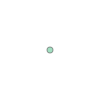

In [15]:
latitud, longitud = -34.93, -57.95
la_plata = Point(longitud, latitud)
la_plata

In [16]:
#Defino una función auxiliar que devuelva un point, tomando los datos de latitud y longitud
def generar_geometria(propiedades_df):
    '''
    
    '''
    
    # Completar
    return Point(propiedades_df["lon"], propiedades_df["lat"]) 

#Creo una nueva variable en el df, donde se crea este point
propiedades_df["geometry"] = propiedades_df.apply(generar_geometria, axis=1)
propiedades_df.head(2)

,start_date,end_date,created_on,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,property_type,operation_type,geometry
25,2020-08-22,2020-09-04,2020-08-22,-34.634144,-58.943668,Bs.As. G.B.A. Zona Oeste,General Rodríguez,NaN,NaN,2.0,1200.0,1200.0,150000.0,ARS,Mensual,Depósito,Alquiler,POINT (-58.943668285 -34.6341439516)
29,2020-08-22,2020-09-04,2020-08-22,-37.103525,-56.859584,Buenos Aires Costa Atlántica,Pinamar,1.0,NaN,1.0,48.0,40.0,30000.0,ARS,Mensual,Departamento,Alquiler temporal,POINT (-56.8595841899 -37.103525066)


In [17]:
#Elimino varaibles de latitud y longitud
propiedades_df = propiedades_df.drop(columns=["lat", "lon"])

In [18]:
# Convierto a GeoDataFrame el df de propiedades
propiedades_gdf = gpd.GeoDataFrame(propiedades_df, geometry="geometry")
propiedades_gdf.head(2)

,start_date,end_date,created_on,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,property_type,operation_type,geometry
25,2020-08-22,2020-09-04,2020-08-22,Bs.As. G.B.A. Zona Oeste,General Rodríguez,NaN,NaN,2.0,1200.0,1200.0,150000.0,ARS,Mensual,Depósito,Alquiler,POINT (-58.94367 -34.63414)
29,2020-08-22,2020-09-04,2020-08-22,Buenos Aires Costa Atlántica,Pinamar,1.0,NaN,1.0,48.0,40.0,30000.0,ARS,Mensual,Departamento,Alquiler temporal,POINT (-56.85958 -37.10353)


In [19]:
propiedades_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 137367 entries, 25 to 999999
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   start_date       137367 non-null  object  
 1   end_date         137367 non-null  object  
 2   created_on       137367 non-null  object  
 3   l2               137367 non-null  object  
 4   l3               137351 non-null  object  
 5   rooms            105613 non-null  float64 
 6   bedrooms         97533 non-null   float64 
 7   bathrooms        124548 non-null  float64 
 8   surface_total    137367 non-null  float64 
 9   surface_covered  137367 non-null  float64 
 10  price            137367 non-null  float64 
 11  currency         136917 non-null  object  
 12  price_period     78405 non-null   object  
 13  property_type    137367 non-null  object  
 14  operation_type   137367 non-null  object  
 15  geometry         137367 non-null  geometry
dtypes: float64(6), g

### Ejercicio 3

3. **Generar un GeoDataFrame con los partidos de Buenos Aires (7pts)**

Usando Geopandas, cargar los shapefiles de departamentos/partidos y provincias en sendos geodataframes. Repetir el procedimiento seguido en la clase sincrónica 5 para asociar los departamentos/partidos a sus respectivas provincias. Filtrar el GeoDataFrame resultante de manera de quedarse con los registros correspondientes a sólo la provincia de Buenos Aires (o la provincia que hayan elegido). Llamarlo `partidos_bsas_gdf` o `departamentos_<provincia>_gdf`.

In [20]:
#Cargo shapefile de provincias 
provincias_gdf = gpd.read_file(filename="data/provincia.zip")
provincias_gdf.head()

,gid,entidad,objeto,fna,gna,nam,in1,fdc,sag,geometry
0,1,0.0,Provincia,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma,Ciudad Autónoma de Buenos Aires,02,Geografía,IGN,"MULTIPOLYGON (((-58.34189 -34.63110, -58.34240..."
1,2,0.0,Provincia,Provincia del Neuquén,Provincia,Neuquén,58,Geografía,IGN,"MULTIPOLYGON (((-68.25000 -37.57478, -68.25000..."
2,3,0.0,Provincia,Provincia de San Luis,Provincia,San Luis,74,Geografía,IGN,"MULTIPOLYGON (((-66.66179 -31.92054, -66.60454..."
3,4,0.0,Provincia,Provincia de Santa Fe,Provincia,Santa Fe,82,Geografía,IGN,"MULTIPOLYGON (((-58.88082 -28.06682, -58.88360..."
4,5,0.0,Provincia,Provincia de La Rioja,Provincia,La Rioja,46,Geografía,IGN,"MULTIPOLYGON (((-65.42299 -30.11960, -65.49056..."


In [21]:
#Examino numero de filas y columnas
provincias_gdf.shape

(24, 10)

In [22]:
provincias_gdf = provincias_gdf[["nam", "geometry"]]
provincias_gdf

,nam,geometry
0,Ciudad Autónoma de Buenos Aires,"MULTIPOLYGON (((-58.34189 -34.63110, -58.34240..."
1,Neuquén,"MULTIPOLYGON (((-68.25000 -37.57478, -68.25000..."
2,San Luis,"MULTIPOLYGON (((-66.66179 -31.92054, -66.60454..."
3,Santa Fe,"MULTIPOLYGON (((-58.88082 -28.06682, -58.88360..."
4,La Rioja,"MULTIPOLYGON (((-65.42299 -30.11960, -65.49056..."
5,Catamarca,"MULTIPOLYGON (((-66.09976 -26.22049, -66.10088..."
6,Tucumán,"MULTIPOLYGON (((-64.49532 -26.21937, -64.49723..."
7,Chaco,"MULTIPOLYGON (((-58.37735 -26.87223, -58.37764..."
8,Formosa,"MULTIPOLYGON (((-58.37735 -26.87223, -58.37935..."
9,Santa Cruz,"MULTIPOLYGON (((-71.54709 -45.99975, -71.54573..."


In [23]:
#Cargo shape file de departamentos
departamentos_gdf = gpd.read_file("data/departamento.zip")

In [24]:
# Extraemos las columnas de interés, objectid es un identificador único para cada departamento a nivel país 
departamentos_gdf = departamentos_gdf[["objectid", "nam", "geometry"]]

# Renombramos la columna que da el nombre del departamento
departamentos_gdf = departamentos_gdf.rename({"nam": "departamento"}, axis=1)

In [25]:
departamentos_gdf

,objectid,departamento,geometry
0,8076.0,Federal,"POLYGON ((-58.57731 -30.69016, -58.57512 -30.6..."
1,8077.0,Gualeguaychú,"POLYGON ((-58.13011 -33.02912, -58.13087 -33.0..."
2,8078.0,Islas del Ibicuy,"POLYGON ((-58.57589 -34.02675, -58.57593 -34.0..."
3,8268.0,Cushamen,"POLYGON ((-71.17490 -41.99995, -71.05132 -41.9..."
4,8079.0,Victoria,"POLYGON ((-59.77158 -32.58791, -59.77198 -32.5..."
...,...,...,...
524,8576.0,Iglesia,"POLYGON ((-69.62981 -28.39369, -69.62956 -28.3..."
525,8577.0,Jáchal,"POLYGON ((-68.25879 -29.74673, -68.26262 -29.7..."
526,8578.0,Valle Fértil,"POLYGON ((-67.99199 -29.97924, -67.99151 -29.9..."
527,8579.0,La Plata,"MULTIPOLYGON (((-57.99666 -34.87535, -57.99087..."


**Problema**: El df no tiene el nombre de la provincia asociada a cada departamento. Se la infiere mediante relaciones espaciales. Se repite procedimiento de la clase 5

In [26]:
departamentos_punto_adentro_gdf = departamentos_gdf.copy()
departamentos_punto_adentro_gdf["geometry"] = departamentos_gdf.geometry.representative_point();

In [27]:
departamentos_punto_adentro_gdf

,objectid,departamento,geometry
0,8076.0,Federal,POINT (-58.91187 -31.02845)
1,8077.0,Gualeguaychú,POINT (-58.74370 -32.99769)
2,8078.0,Islas del Ibicuy,POINT (-58.89465 -33.59711)
3,8268.0,Cushamen,POINT (-70.75026 -42.47312)
4,8079.0,Victoria,POINT (-60.25788 -32.75127)
...,...,...,...
524,8576.0,Iglesia,POINT (-69.47882 -29.59285)
525,8577.0,Jáchal,POINT (-68.45414 -30.29809)
526,8578.0,Valle Fértil,POINT (-67.59727 -30.59801)
527,8579.0,La Plata,POINT (-57.99022 -35.03683)


In [28]:
prov_dep_gdf = departamentos_punto_adentro_gdf.sjoin(provincias_gdf, predicate="within")
prov_dep_gdf

,objectid,departamento,geometry,index_right,nam
0,8076.0,Federal,POINT (-58.91187 -31.02845),13,Entre Ríos
1,8077.0,Gualeguaychú,POINT (-58.74370 -32.99769),13,Entre Ríos
2,8078.0,Islas del Ibicuy,POINT (-58.89465 -33.59711),13,Entre Ríos
3,8268.0,Cushamen,POINT (-70.75026 -42.47312),10,Chubut
4,8079.0,Victoria,POINT (-60.25788 -32.75127),13,Entre Ríos
...,...,...,...,...,...
524,8576.0,Iglesia,POINT (-69.47882 -29.59285),14,San Juan
525,8577.0,Jáchal,POINT (-68.45414 -30.29809),14,San Juan
526,8578.0,Valle Fértil,POINT (-67.59727 -30.59801),14,San Juan
527,8579.0,La Plata,POINT (-57.99022 -35.03683),23,Buenos Aires


In [29]:
prov_dep_df = prov_dep_gdf[["objectid", "nam"]]

In [30]:
departamentos_gdf = departamentos_gdf.merge(prov_dep_df, how="inner", on="objectid")

In [31]:
departamentos_gdf = departamentos_gdf.rename({"nam_x": "nam"}, axis=1)

In [32]:
provincias = set(departamentos_gdf.nam.to_list())

In [33]:
departamentos_gdf

,objectid,departamento,geometry,nam
0,8076.0,Federal,"POLYGON ((-58.57731 -30.69016, -58.57512 -30.6...",Entre Ríos
1,8077.0,Gualeguaychú,"POLYGON ((-58.13011 -33.02912, -58.13087 -33.0...",Entre Ríos
2,8078.0,Islas del Ibicuy,"POLYGON ((-58.57589 -34.02675, -58.57593 -34.0...",Entre Ríos
3,8268.0,Cushamen,"POLYGON ((-71.17490 -41.99995, -71.05132 -41.9...",Chubut
4,8079.0,Victoria,"POLYGON ((-59.77158 -32.58791, -59.77198 -32.5...",Entre Ríos
...,...,...,...,...
524,8576.0,Iglesia,"POLYGON ((-69.62981 -28.39369, -69.62956 -28.3...",San Juan
525,8577.0,Jáchal,"POLYGON ((-68.25879 -29.74673, -68.26262 -29.7...",San Juan
526,8578.0,Valle Fértil,"POLYGON ((-67.99199 -29.97924, -67.99151 -29.9...",San Juan
527,8579.0,La Plata,"MULTIPOLYGON (((-57.99666 -34.87535, -57.99087...",Buenos Aires


In [34]:
# Filtro el gdf para tener los registros de provincia de Buenos Aires
# Primero, me fijo los valores que toma la columna "nam", que indica la provincia
unique_nam = departamentos_gdf["nam"].unique()
print(unique_nam)

['Entre Ríos' 'Chubut' 'Buenos Aires' 'Salta' 'Neuquén' 'La Rioja'
 'Córdoba' 'Chaco' 'Formosa' 'Río Negro' 'Corrientes' 'San Luis'
 'San Juan' 'Catamarca' 'Santiago del Estero' 'Mendoza' 'Santa Fe'
 'Misiones' 'Jujuy' 'Santa Cruz' 'Ciudad Autónoma de Buenos Aires'
 'La Pampa' 'Tierra del Fuego, Antártida e Islas del Atlántico Sur'
 'Tucumán']


In [35]:
#Me quedo con las observaciones donde la columna "nam" sea "Buenos Aires"
filtro_dep_bsas = departamentos_gdf["nam"].str.match(r"Buenos Aires", flags=re.IGNORECASE)
departamentos_bsas_gdf = departamentos_gdf[filtro_dep_bsas]
departamentos_bsas_gdf.shape

(135, 4)

In [36]:
departamentos_bsas_gdf

,objectid,departamento,geometry,nam
8,8083.0,Saladillo,"POLYGON ((-59.18145 -35.75551, -59.18139 -35.7...",Buenos Aires
9,8084.0,Las Flores,"POLYGON ((-58.70753 -36.01728, -58.70772 -36.0...",Buenos Aires
10,8085.0,Rojas,"POLYGON ((-60.49639 -34.17646, -60.49634 -34.1...",Buenos Aires
11,8086.0,Escobar,"POLYGON ((-58.71215 -34.24890, -58.69112 -34.2...",Buenos Aires
12,8087.0,José C. Paz,"POLYGON ((-58.78454 -34.47607, -58.78316 -34.4...",Buenos Aires
...,...,...,...,...
480,8548.0,Lanús,"POLYGON ((-58.40254 -34.65999, -58.40265 -34.6...",Buenos Aires
481,8549.0,Lomas de Zamora,"POLYGON ((-58.34696 -34.73934, -58.34596 -34.7...",Buenos Aires
498,8586.0,San Fernando,"MULTIPOLYGON (((-58.57862 -34.02716, -58.57593...",Buenos Aires
499,8587.0,Tigre,"POLYGON ((-58.51416 -34.44353, -58.51441 -34.4...",Buenos Aires


### Ejercicio 4

5. **Asociar inmuebles a sus respectivos partidos mediante información georreferenciada** <br>
Notar que en el GeoDataFrame de Properati tenemos la columna `l3`, pero no es claro si esto representa una localidad o un partido. 
En este ejercicio, vamos a realizar un join espacial (`sjoin`) de `propiedades_gdf` con el `partidos_bsas_gdf` generado en el punto anterior. Luego, deben determinar para cuántos de los registros, la columna `l3` coincide con el nombre del partido proveniente de `partidos_bsas_gdf`. Dejar mencionado como comentario algunos casos que detecten en los que no coinciden estos valores. <br>
Finalmente, descartar los departamentos con menos de 10 registros (recordar `groupby(...).filter` de la clase 4).

In [37]:
#Se realiza un join espacial y se crea un nuevo df con los datos de cada propiedad y su departamento correspondiente, identificando los inmuebles que se encuentran dentro de cada departamento con "intersects"
prop_dep_bsas = departamentos_bsas_gdf.sjoin(propiedades_gdf, predicate="intersects")
prop_dep_bsas.sample(10)

C:\Users\ferma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\geopandas\geodataframe.py:2195: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)  # noqa: B026


,objectid,departamento,geometry,nam,index_right,start_date,end_date,created_on,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,property_type,operation_type
27,8091.0,Moreno,"POLYGON ((-58.77603 -34.55706, -58.77694 -34.5...",Buenos Aires,689560,2020-09-11,2020-09-13,2020-09-11,Bs.As. G.B.A. Zona Oeste,Moreno,4.0,3.0,2.0,300.0,116.0,67900.0,USD,NaN,Casa,Venta
301,8348.0,Morón,"POLYGON ((-58.61603 -34.58871, -58.61559 -34.5...",Buenos Aires,971123,2020-10-02,2020-10-03,2020-10-02,Bs.As. G.B.A. Zona Oeste,Morón,NaN,NaN,NaN,300.0,300.0,250000.0,USD,Mensual,Local comercial,Venta
296,8345.0,Pilar,"POLYGON ((-58.90081 -34.31094, -58.90043 -34.3...",Buenos Aires,675963,2020-12-15,2021-01-10,2020-12-15,Bs.As. G.B.A. Zona Norte,Pilar,NaN,NaN,NaN,1688.0,1688.0,42000.0,USD,NaN,Lote,Venta
11,8086.0,Escobar,"POLYGON ((-58.71215 -34.24890, -58.69112 -34.2...",Buenos Aires,75154,2020-07-28,2020-07-29,2020-07-28,Bs.As. G.B.A. Zona Norte,Escobar,NaN,3.0,2.0,839.0,162.0,225000.0,USD,NaN,Casa,Venta
301,8348.0,Morón,"POLYGON ((-58.61603 -34.58871, -58.61559 -34.5...",Buenos Aires,921042,2020-10-03,2020-10-06,2020-10-03,Bs.As. G.B.A. Zona Oeste,Morón,2.0,NaN,1.0,44.0,40.0,92500.0,USD,NaN,Departamento,Venta
527,8579.0,La Plata,"MULTIPOLYGON (((-57.99666 -34.87535, -57.99087...",Buenos Aires,652943,2021-01-23,2021-03-18,2021-01-23,Bs.As. G.B.A. Zona Sur,La Plata,5.0,3.0,2.0,1000.0,241.0,400000.0,USD,NaN,Casa,Venta
311,8386.0,San Isidro,"POLYGON ((-58.51416 -34.44353, -58.51422 -34.4...",Buenos Aires,731401,2020-11-19,2021-04-26,2020-11-19,Bs.As. G.B.A. Zona Norte,San Isidro,2.0,1.0,2.0,69.0,64.0,250000.0,USD,Mensual,Departamento,Venta
22,8364.0,Ezeiza,"POLYGON ((-58.52051 -34.74106, -58.52054 -34.7...",Buenos Aires,113334,2021-05-22,2021-05-28,2021-05-22,Bs.As. G.B.A. Zona Sur,Ezeiza,NaN,NaN,NaN,667.0,667.0,38000.0,USD,NaN,Lote,Venta
311,8386.0,San Isidro,"POLYGON ((-58.51416 -34.44353, -58.51422 -34.4...",Buenos Aires,52071,2021-05-24,2021-06-05,2021-05-24,Bs.As. G.B.A. Zona Norte,San Isidro,4.0,NaN,3.0,225.0,190.0,650000.0,USD,Mensual,Casa,Venta
296,8345.0,Pilar,"POLYGON ((-58.90081 -34.31094, -58.90043 -34.3...",Buenos Aires,125507,2020-10-04,2021-04-09,2020-10-04,Bs.As. G.B.A. Zona Norte,Pilar,3.0,NaN,4.0,175.0,150.0,218000.0,USD,NaN,Casa,Venta


In [38]:
prop_dep_bsas["l3"].dtype

dtype('O')

In [39]:
prop_dep_bsas["departamento"].dtype

dtype('O')

In [40]:
#Creo una dummy que toma el valor 1 si la variables "l3" del df de propiedades y la varible "departamento" del df de departmantamentos son iguales
prop_dep_bsas["match"] = (prop_dep_bsas["l3"] == prop_dep_bsas["departamento"]).astype(int)

In [41]:
prop_dep_bsas.shape

(137320, 21)

In [42]:
#Hago la suma de la dummy "match"
#El resultado es el número de observaciones donde match ==1, es decir que "l3" y "departamento" coinciden
prop_dep_bsas["match"].sum() 

np.int64(129228)

In [43]:
# Veo una sample aleatoria de las observaciones donde las variables "l3" y "departamento" no coinciden
prop_dep_bsas[prop_dep_bsas["match"] == 0].sample(n=10) 

,objectid,departamento,geometry,nam,index_right,start_date,end_date,created_on,l2,l3,...,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,property_type,operation_type,match
11,8086.0,Escobar,"POLYGON ((-58.71215 -34.24890, -58.69112 -34.2...",Buenos Aires,257615,2020-11-09,2020-11-16,2020-11-09,Bs.As. G.B.A. Zona Norte,Pilar,...,6.0,4.0,363.0,305.0,729000.0,USD,Mensual,Casa,Venta,0
39,8106.0,La Costa,"POLYGON ((-56.79023 -37.03413, -56.79113 -37.0...",Buenos Aires,736406,2020-12-05,2020-12-17,2020-12-05,Buenos Aires Costa Atlántica,Costa Esmeralda,...,NaN,2.0,130.0,130.0,2100.0,USD,NaN,Casa,Alquiler temporal,0
34,8101.0,General Pueyrredón,"POLYGON ((-57.51973 -37.88948, -57.51973 -37.8...",Buenos Aires,473310,2020-12-19,9999-12-31,2020-12-19,Buenos Aires Costa Atlántica,Mar del Plata,...,NaN,NaN,185.0,214.0,250000.0,USD,Mensual,Casa,Venta,0
34,8101.0,General Pueyrredón,"POLYGON ((-57.51973 -37.88948, -57.51973 -37.8...",Buenos Aires,682951,2021-03-23,2021-06-05,2021-03-23,Buenos Aires Costa Atlántica,Mar del Plata,...,1.0,1.0,37.0,35.0,68000.0,USD,Mensual,Departamento,Venta,0
34,8101.0,General Pueyrredón,"POLYGON ((-57.51973 -37.88948, -57.51973 -37.8...",Buenos Aires,732199,2020-11-19,2021-03-01,2020-11-19,Buenos Aires Costa Atlántica,Mar del Plata,...,3.0,2.0,177.0,177.0,1500.0,USD,Mensual,Casa,Alquiler temporal,0
39,8106.0,La Costa,"POLYGON ((-56.79023 -37.03413, -56.79113 -37.0...",Buenos Aires,708395,2020-09-17,2021-01-09,2020-09-17,Buenos Aires Costa Atlántica,San Bernardo,...,2.0,1.0,40.0,37.0,52000.0,USD,NaN,Departamento,Venta,0
36,8103.0,Villa Gesell,"POLYGON ((-56.90913 -37.18903, -56.90915 -37.1...",Buenos Aires,587581,2020-06-04,2020-06-25,2020-06-04,Buenos Aires Costa Atlántica,Mar de las Pampas,...,2.0,2.0,86.0,80.0,99000.0,USD,Mensual,Departamento,Venta,0
34,8101.0,General Pueyrredón,"POLYGON ((-57.51973 -37.88948, -57.51973 -37.8...",Buenos Aires,429724,2021-04-01,2021-04-19,2021-04-01,Buenos Aires Costa Atlántica,Mar del Plata,...,1.0,1.0,55.0,47.0,52000.0,USD,NaN,Departamento,Venta,0
39,8106.0,La Costa,"POLYGON ((-56.79023 -37.03413, -56.79113 -37.0...",Buenos Aires,155587,2020-12-20,2021-04-09,2020-12-20,Buenos Aires Costa Atlántica,Santa Teresita,...,NaN,1.0,58.0,51.0,40000.0,USD,NaN,Casa,Venta,0
34,8101.0,General Pueyrredón,"POLYGON ((-57.51973 -37.88948, -57.51973 -37.8...",Buenos Aires,658045,2020-07-17,2021-04-15,2020-07-17,Buenos Aires Costa Atlántica,Mar del Plata,...,1.0,1.0,62.0,70.0,169000.0,USD,NaN,Departamento,Venta,0


Algunos casos observados: 
- "departamento" = San Nicolás & "l3" = San Nicolás de los Arroyos
- "departamento" = José C. Paz & "l3" = José C Paz
- "departamento" = General Pueyrredón & "l3" = Mar del Plata
- "departamento" = La Costa & "l3" = Santa Teresita
- "departamento" = La Costa & "l3" = San Bernardo

In [44]:
#Descarto los departamentos con menos de 10 registros
#Para esto creo una variable que cuenta el numero de observaciones agrupando por departamentos
prop_dep_bsas["freq_dep"] = prop_dep_bsas.groupby("departamento")["departamento"].transform("count")

In [45]:
#Me fijo el numero de filas actual 
prop_dep_bsas.shape

(137320, 22)

In [46]:
# Mantengo solo las observaciones donde la variable "freq_dep" es mayor o igual a 10
prop_dep_bsas.groupby("departamento").filter(lambda x: x['freq_dep'].iloc[0] >= 10)

,objectid,departamento,geometry,nam,index_right,start_date,end_date,created_on,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,property_type,operation_type,match,freq_dep
11,8086.0,Escobar,"POLYGON ((-58.71215 -34.24890, -58.69112 -34.2...",Buenos Aires,389049,2021-02-10,9999-12-31,2021-02-10,Bs.As. G.B.A. Zona Norte,Escobar,...,2.0,600.0,220.0,265000.0,USD,Mensual,Casa,Venta,1,5795
11,8086.0,Escobar,"POLYGON ((-58.71215 -34.24890, -58.69112 -34.2...",Buenos Aires,389048,2021-02-10,9999-12-31,2021-02-10,Bs.As. G.B.A. Zona Norte,Escobar,...,2.0,600.0,220.0,265000.0,USD,Mensual,Casa,Venta,1,5795
11,8086.0,Escobar,"POLYGON ((-58.71215 -34.24890, -58.69112 -34.2...",Buenos Aires,335818,2020-11-06,2021-02-01,2020-11-06,Bs.As. G.B.A. Zona Norte,Escobar,...,3.0,600.0,200.0,295000.0,USD,Mensual,Casa,Venta,1,5795
11,8086.0,Escobar,"POLYGON ((-58.71215 -34.24890, -58.69112 -34.2...",Buenos Aires,335822,2020-11-06,2020-12-13,2020-11-06,Bs.As. G.B.A. Zona Norte,Escobar,...,2.0,600.0,220.0,275000.0,USD,Mensual,Casa,Venta,1,5795
11,8086.0,Escobar,"POLYGON ((-58.71215 -34.24890, -58.69112 -34.2...",Buenos Aires,861924,2021-03-02,2021-06-05,2021-03-02,Bs.As. G.B.A. Zona Norte,Escobar,...,3.0,360.0,360.0,500000.0,USD,Mensual,Casa,Venta,1,5795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,8579.0,La Plata,"MULTIPOLYGON (((-57.99666 -34.87535, -57.99087...",Buenos Aires,435442,2021-03-22,2021-06-05,2021-03-22,Bs.As. G.B.A. Zona Sur,La Plata,...,2.0,230.0,230.0,319000.0,USD,Mensual,Casa,Venta,1,13574
527,8579.0,La Plata,"MULTIPOLYGON (((-57.99666 -34.87535, -57.99087...",Buenos Aires,91245,2020-07-15,2020-07-16,2020-07-15,Bs.As. G.B.A. Zona Sur,La Plata,...,1.0,300.0,300.0,17000.0,ARS,NaN,Casa,Alquiler,1,13574
527,8579.0,La Plata,"MULTIPOLYGON (((-57.99666 -34.87535, -57.99087...",Buenos Aires,677703,2020-12-15,9999-12-31,2020-12-15,Bs.As. G.B.A. Zona Sur,La Plata,...,1.0,50.0,60.0,85000.0,USD,Mensual,Departamento,Venta,1,13574
527,8579.0,La Plata,"MULTIPOLYGON (((-57.99666 -34.87535, -57.99087...",Buenos Aires,860016,2021-03-02,2021-06-18,2021-03-02,Bs.As. G.B.A. Zona Sur,La Plata,...,NaN,482.0,482.0,35000.0,USD,NaN,Lote,Venta,1,13574


In [47]:
#Me fijo el numero de filas luego de eliminar los departamentos con menos de 10 registros 
prop_dep_bsas.shape

(137320, 22)

### Ejercicio 5

7. **Número de anuncios por partido, per cápita**. <br>
Generar un mapa de la provincia de Buenos Aires, coloreando cada partido de acuerdo al número de registros normalizado por la población del mismo (en 2010). Utilizar un widget reactivo para visualizar el mapa de acuerdo al tipo de operación: venta, alquiler o alquiler temporal. _Se evaluará la presentación del mapa_.


Hago un merge del gdf `prop_dep_bsas` con `poblacion_PBA` 

In [48]:
import ipywidgets as widgets 
from ipywidgets import interact
from matplotlib import pyplot as plt

In [49]:
mapa_data2= prop_dep_bsas.merge(poblacion_PBA, right_on="partido", left_on="departamento", how="outer")
type(mapa_data2)

geopandas.geodataframe.GeoDataFrame

In [50]:
mapa_data2.sample(5)

,objectid,departamento,geometry,nam,index_right,start_date,end_date,created_on,l2,l3,...,surface_covered,price,currency,price_period,property_type,operation_type,match,freq_dep,partido,poblacion_2010
124842,8356.0,Tres de Febrero,"POLYGON ((-58.61924 -34.54673, -58.61889 -34.5...",Buenos Aires,163116.0,2020-11-16,2020-12-04,2020-11-16,Bs.As. G.B.A. Zona Oeste,Tres de Febrero,...,41.0,54000.0,USD,Mensual,Departamento,Venta,1.0,3817.0,Tres de Febrero,340071.0
34699,8092.0,La Matanza,"POLYGON ((-58.52921 -34.65464, -58.52920 -34.6...",Buenos Aires,989220.0,2020-10-02,2020-10-24,2020-10-02,Bs.As. G.B.A. Zona Oeste,Ituzaingó,...,280.0,850000.0,USD,NaN,Casa,Venta,0.0,5845.0,La Matanza,1775816.0
13022,8335.0,Esteban Echeverría,"POLYGON ((-58.50080 -34.72299, -58.50076 -34.7...",Buenos Aires,476771.0,2020-09-04,2020-09-04,2020-09-04,Bs.As. G.B.A. Zona Sur,Esteban Echeverría,...,32.0,49500.0,USD,Mensual,Departamento,Venta,1.0,1302.0,Esteban Echeverría,300959.0
62002,8362.0,Marcos Paz,"POLYGON ((-58.86029 -34.68521, -58.86034 -34.6...",Buenos Aires,293669.0,2020-12-12,2021-05-21,2020-12-12,Bs.As. G.B.A. Zona Oeste,Marcos Paz,...,200.0,6500.0,USD,NaN,Lote,Venta,1.0,285.0,Marcos Paz,54181.0
23972,8351.0,General San Martín,"POLYGON ((-58.55376 -34.53020, -58.54880 -34.5...",Buenos Aires,422046.0,2021-05-21,2021-06-05,2021-05-21,Bs.As. G.B.A. Zona Norte,General San Martín,...,44.0,68000.0,USD,Mensual,Departamento,Venta,1.0,5641.0,General San Martín,414196.0


Creo variable de la cantidad de registros por departamento, normalizada por la población del mismo en 2010

In [51]:
# Creo una variable que indica cuantos registros hay por departamento. 
mapa_data2["freq_dep"] = mapa_data2.groupby("departamento")["departamento"].transform("count")
# Divido la variable recien creada en la población de 2010 
mapa_data2["reg_norm"] = (mapa_data2["freq_dep"]  / mapa_data2["poblacion_2010"])

Mapa de la provincia de Buenos Aires que muestra la cantidad de registros por departamento (normalizada por la población), según tipo de operación. 

In [52]:
mapa_data2["operation_type"] = mapa_data2["operation_type"].astype(str)
mapa_data2_w = widgets.Dropdown(options=sorted(mapa_data2["operation_type"].unique()), description="Tipo de operación")

@interact(tipo=mapa_data2_w)
def mostrar_deptos_por_operacion(tipo):

    mapa_filtrado = mapa_data2[mapa_data2["operation_type"] == tipo]

    mapa_filtrado.plot(
        column="reg_norm",
        cmap="Set3",
        figsize=(10, 10),
        edgecolor="black",
        legend=True,
        legend_kwds={"label": "Cant. de registros (normalizado por la población)", "orientation": "horizontal"}
    )

interactive(children=(Dropdown(description='Tipo de operación', options=('Alquiler', 'Alquiler temporal', 'Ven…